## PRiAD Projekt

# Breast Cancer Diagnostic

**Zbór danych**: Breast Cancer Wisconsin (Diagnostic). Predict whether the cancer is benign or malignant

**Zadanie**: Eksploracyjna analiza danych oraz predykcja czy rak jest złośliwy (M) czy łagodny (B)  dla zbioru Breast Cancer Wisconsin

**Skład zespołu**: Martyna Kochalska, Polina Nesterova

**Data wykonania**: DD-MM-RRRR

## 1. Import bibliotek i wczytanie zbioru danych

In [43]:
import kagglehub

# Download latest version
path = "data.csv"

print("Path to dataset files:", path)

Path to dataset files: data.csv


In [44]:
# Importy 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Wczytanie danych
data = pd.read_csv(path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Wyjaśnienie:
W tej sekcji importujemy niezbędne biblioteki, takie jak `pandas` do przetwarzania danych, `seaborn` i `matplotlib` do wizualizacji, oraz narzędzia ze `sklearn` do przetwarzania danych i ich podziału. 

Dane pochodzą ze zbioru Breast Cancer Wisconsin (Diagnostic), a poniższy kod przedstawia **pierwszych kilka wierszy danych**.

## 2. Analiza rozkładu klas

Rozkład klas (diagnosis):
diagnosis
B    357
M    212
Name: count, dtype: int64


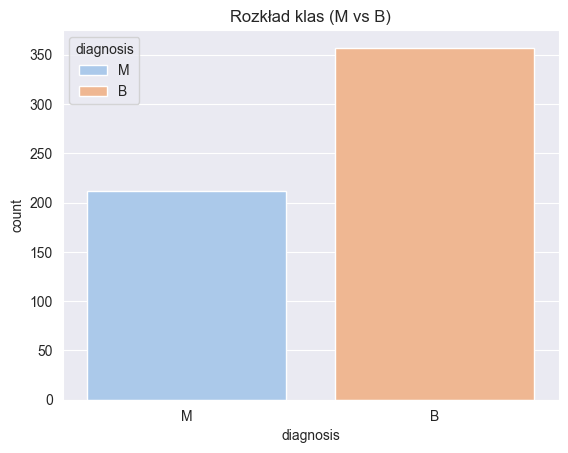

In [45]:
print("Rozkład klas (diagnosis):")
print(data['diagnosis'].value_counts())

sns.countplot(x='diagnosis', hue='diagnosis', data=data, palette='pastel', legend=True)
plt.title("Rozkład klas (M vs B)")
plt.show()

### Wyjaśnienie: 
Z powyższego wykresu możemy określić, czy dane są zbalansowane. 
W przypadku klasyfikacji niezbalansowany zbior może wymagać specjalnych metod np. oversampling.

## 4. Konwersja klasy na wartości binarne (M: 1, B: 0)

In [46]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

### Wyjaśnienie: 
Konwersja wartości diagnozy na wartości binarne (M: 1, B: 0) upraszcza interpretację wyników modelu klasyfikacyjnego i umożliwia łatwiejszą implementację algorytmów ML.

## 5. Usunięcie kolumny 'id', ponieważ nie wnosi wartości do analizy

In [47]:
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)

### Wyjaśnienie: 
Kolumna 'id' to tylko identyfikator i nie ma związku z predykcją. 
Usunięcie jej zmniejsza szum w danych.

## 6. Wizualizacja - wykresy pudełkowe dla wybranych cech

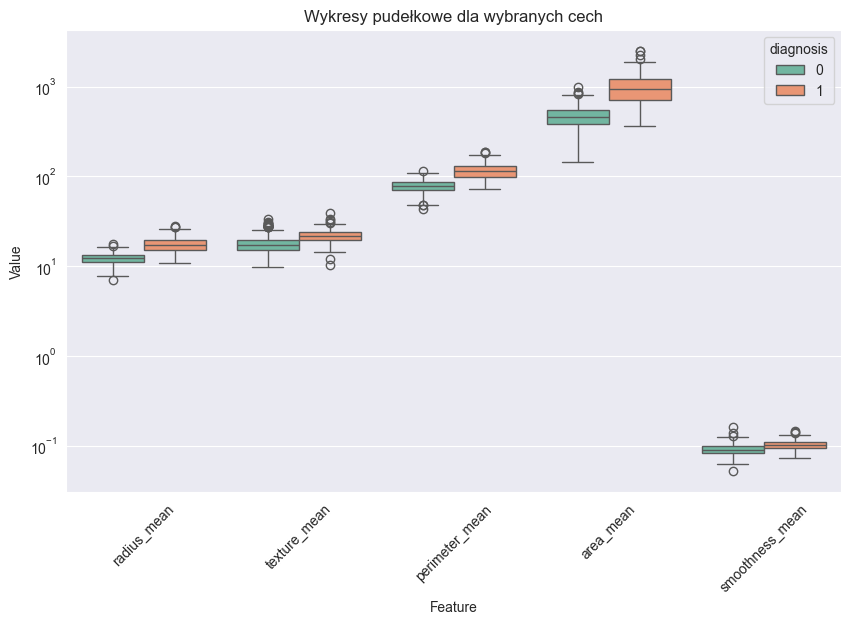

In [48]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
data_melted = data.melt(id_vars='diagnosis', value_vars=features, 
                        var_name='Feature', value_name='Value')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', hue='diagnosis', data=data_melted, palette='Set2')
plt.yscale('log')  # Logarytmiczna skala dla osi Y
plt.title("Wykresy pudełkowe dla wybranych cech")
plt.xticks(rotation=45)
plt.show()

### Wyjaśnienie: 
Wykres pudełkowy pozwala wizualizować rozkład wartości danej cechy w zależności od klasy diagnozy (M lub B). 


### Wnioski: 
Wykresy pudełkowe pokazują wyraźne różnice w rozkładzie wartości cech między klasami diagnozy. Cechy takie jak radius_mean i area_mean mogą być kluczowe w odróżnianiu klas, co warto uwzględnić podczas wyboru cech do modelu.

## 7. Wizualizacja - histogramy dla wybranych cech

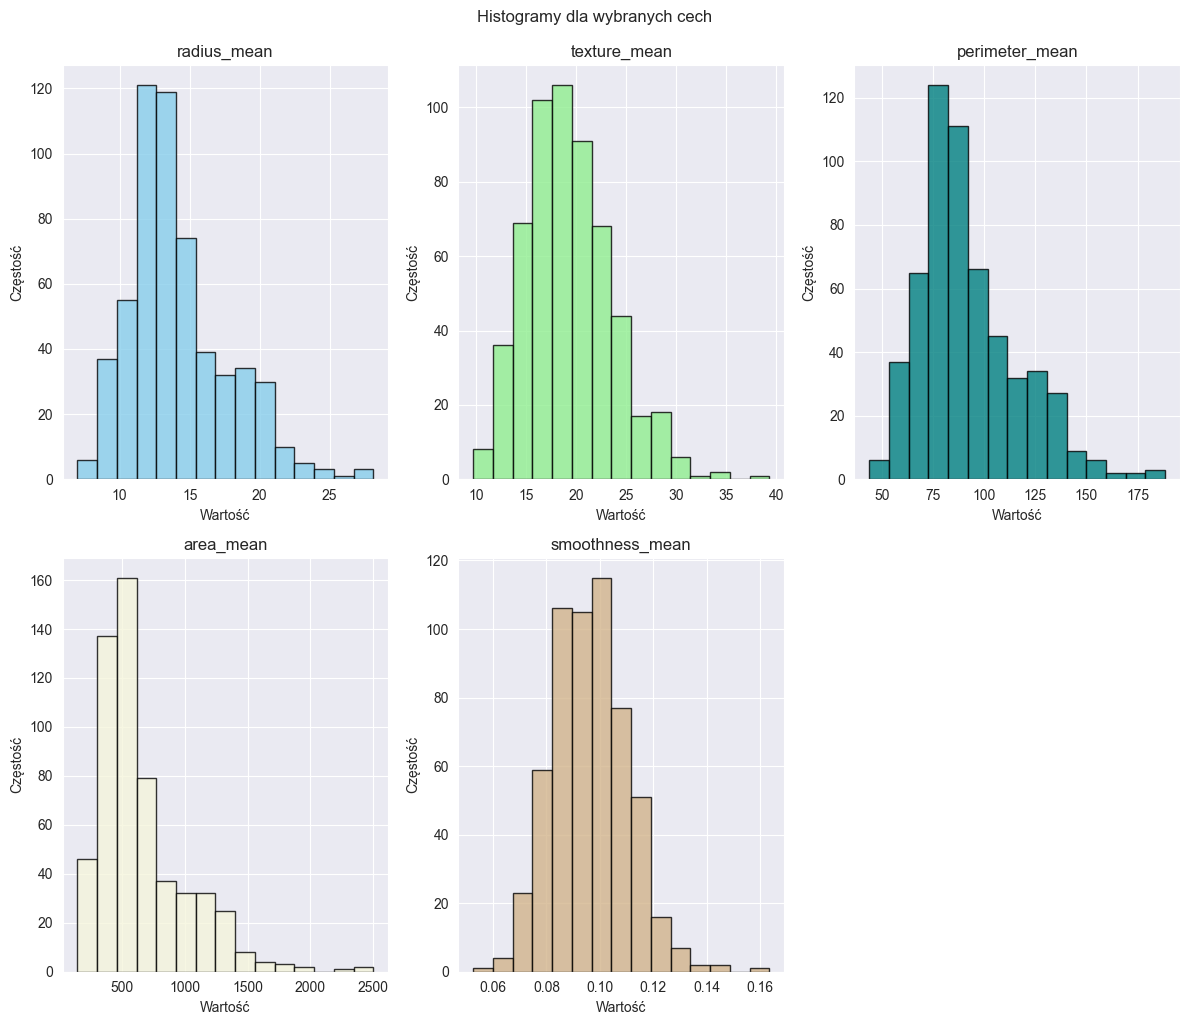

In [49]:
colors = ['skyblue', 'lightgreen', 'teal', 'beige', 'tan']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Układ w siatce 2x3 (dla maksymalnie 6 cech)
    data[feature].hist(bins=15, color=colors[i], edgecolor='black', alpha=0.8)
    plt.title(feature)
    plt.xlabel("Wartość")
    plt.ylabel("Częstość")

plt.tight_layout()  # Automatyczne dopasowanie wykresów
plt.suptitle("Histogramy dla wybranych cech", y=1.02)  # Tytuł globalny
plt.show()


### Wyjaśnienie: 
Histogram pokazuje rozkład liczebności dla każdej cechy i pozwala zidentyfikować, czy istnieje wyraźna separacja między klasami.

### Wnioski: 
Histogramy potwierdzają, że pewne cechy, takie jak radius_mean czy perimeter_mean, mają rozkłady, które mogą ułatwić separację klas. Widoczne różnice w wartościach między klasami wskazują na ich wysoką istotność w klasyfikacji.

In [50]:
## 8. Analiza korelacji

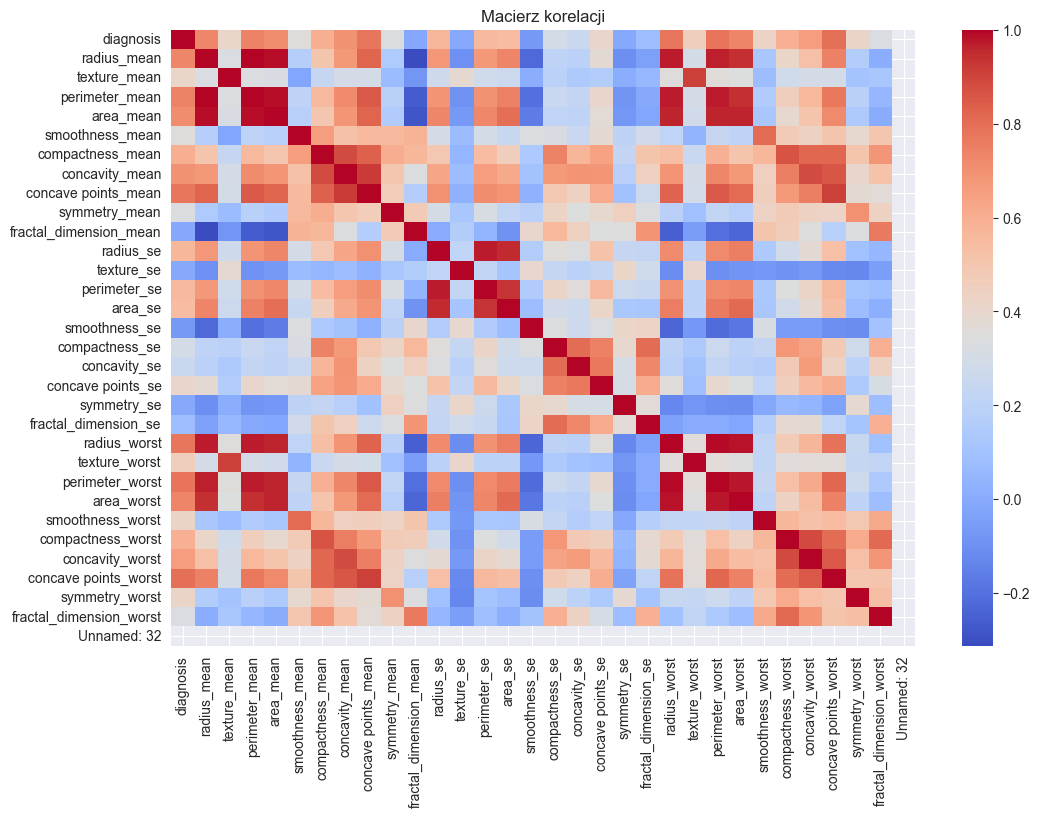

In [51]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Macierz korelacji")
plt.show()

### Wyjaśnienie: 
Macierz korelacji pokazuje siłę związku między zmiennymi. Można na jej podstawie wybrać najbardziej istotne cechy do modelu

## 9. Identyfikacja najważniejszych cech względem diagnozy

In [52]:
correlation_with_diagnosis = correlation_matrix['diagnosis'].sort_values(ascending=False)
print("Korelacja cech z diagnozą (malejąco):")
print(correlation_with_diagnosis.head(10))

Korelacja cech z diagnozą (malejąco):
diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64


### Wyjaśnienie: 
Wysoka korelacja wskazuje cechy najbardziej związane z klasyfikacją diagnozy.

### Wnioski: 
Cechy takie jak **concave points_worst, perimeter_worst, itd** mają najwyższą korelację z diagnozą. Powinny one zostać uwzględnione w modelu klasyfikacyjnym, ponieważ mają największy wpływ na wyniki.

## 10. Sprawdzenie brakujących wartości

In [53]:
missing_values = data.isnull().sum()
print(f"Brakujące wartości (suma w całych danych) = {missing_values.sum()}")

Brakujące wartości (suma w całych danych) = 569


### Wyjaśnienie: 
Brak brakujących wartości oznacza, że nie musimy stosować imputacji czy usuwania wierszy.

## 11. Normalizacja/standaryzacja danych

In [54]:
features_to_scale = data.drop('diagnosis', axis=1).columns

### 11.a. Sprawdzenie cech o zerowej wariancji

In [55]:
zero_var_features = [col for col in features_to_scale if data[col].nunique() <= 1]
if zero_var_features:
    print("Cechy o zerowej wariancji:", zero_var_features)
    data.drop(columns=zero_var_features, inplace=True)
    features_to_scale = data.drop('diagnosis', axis=1).columns

Cechy o zerowej wariancji: ['Unnamed: 32']


### 11.b. Sprawdzenie obecności wartości nieskończonych

In [56]:
infinite_values = data[features_to_scale].isin([np.inf, -np.inf]).sum()
if infinite_values.sum() > 0:
    print("Znaleziono wartości nieskończone w kolumnach:")
    print(infinite_values[infinite_values > 0])
    # Zamiana wartości nieskończonych na NaN
    data[features_to_scale] = data[features_to_scale].replace([np.inf, -np.inf], np.nan)
    # Opcjonalnie: usunięcie wierszy z NaN
    data.dropna(subset=features_to_scale, inplace=True)

### 11.c. Finalne sprawdzenie brakujących wartości po ewentualnych korektach

In [57]:
missing_after = data[features_to_scale].isnull().sum().sum()
if missing_after > 0:
    print(f"Usuwanie wierszy z brakującymi wartościami: {missing_after}")
    data.dropna(subset=features_to_scale, inplace=True)

### 11.d. Standaryzacja danych

In [58]:
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

### Wyjaśnienie: 
Standaryzacja danych zapewnia porównywalność cech niezależnie od ich jednostek i zakresów.
Normalizacja zapewnia porównywalność cech, co jest kluczowe dla algorytmów wrażliwych na różnice w skalach, takich jak regresja logistyczna czy SVM. Usunięcie cech o zerowej wariancji (Unnamed: 32) eliminuje zmienne, które nie wnoszą żadnej informacji do modelu.

## 12. Podział na zbior treningowy i testowy


In [59]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Przygotowanie danych zakończone.")
print("Rozmiar zbioru treningowego:", X_train.shape)
print("Rozmiar zbioru testowego:", X_test.shape)

Przygotowanie danych zakończone.
Rozmiar zbioru treningowego: (455, 30)
Rozmiar zbioru testowego: (114, 30)


### Wyjaśnienie: 
Rozdzielenie danych na zbiór treningowy i testowy zapewnia możliwość oceny modelu na niezależnym zbiorze. Rozkład (80% treningowy, 20% testowy) jest standardowy i powinien umożliwić dobrą ocenę wydajności modelu.

## 13. Klasyfikacja

W tej części zastosujemu różne modele klasyfikacyjne, takie jak
KNN, Naive Bayes oraz Drzewo Decyzyjne, o których uczyliśmy się na zajęciach, oraz dodatkowo zapoznamy się z metodą Random Forest oraz Regresją logistyczną. Uzyskamy ich skuteczność korzystając z danych testowych, a na koniec porównamy wyniki danych modeli. 

Zaimportujmy najpierw niezbędne biblioteki:

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

KNeighborsClassifier - gotowa implementacja algorytmu KNN z biblioteki scikit-learn  <br>
accuracy_score - metryka oceny skuteczności klasyfikacji  <br>
GaussianNB - gotowa implementacja algorytmu Naive Bayes z biblioteki scikit-learn  <br>
DecisionTreeClassifier - gotowa implementacja algorytmu Drzewa Decyzyjnego z biblioteki  scikit-learn  <br>
classification_report - raport klasyfikacji, który zawiera miary takie jak precision, recall, f1-score i support (czyli   <br>

### Model KNN

Sprawdźmy 

In [75]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.9473684210526315


### Model Naive Bayes'a

In [62]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9649122807017544


### Model Drzewa Decyzyjnego

In [63]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9473684210526315


### Porównanie wyników

In [64]:

print("\n=== KNN Classification Report ===")
print(classification_report(y_test, y_pred_knn))

print("\n=== Naive Bayes Classification Report ===")
print(classification_report(y_test, y_pred_nb))

print("\n=== Decision Tree Classification Report ===")
print(classification_report(y_test, y_pred_tree))



=== KNN Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


=== Naive Bayes Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   ma